# This is a proof of concept for appying traditional audio-processing effects to video data

## imports: 
* numpy for numpy, 
* mydia for importing video as a 4d tensor, 
* pysndfx for appying audio effects via native SoX lib - process piping too slow
* IPython.display for playing video


In [41]:
import numpy as np
import cv2
import mydia
from pysndfx import AudioEffectsChain
from IPython.display import clear_output, Image, display

In [44]:

def playVideo(vid):
    def arrayShow (imageArray):
        #TODO: convert from bgr to rgb
        #TODO: get frame timing right
        ret, jpg = cv2.imencode('.jpg', imageArray)
        return Image(data=jpg, embed=True)
    for frame in vid:
        try:
            clear_output(wait=True)
            img = arrayShow(frame)
            display(img)
        except KeyboardInterrupt: break


In [43]:
reader = mydia.Videos()
#will be of shape (num_videos, num_frames, height, width, color_depth)
video = reader.read("./res/demovid_unprocessed.mp4")[0] # get video tensor
video_unprocessed = video.copy()

  0%|          | 0/1 [00:00<?, ?videos/s]C:\Users\TheoA\anaconda3\lib\site-packages\mydia\mydia.py:234: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  video_tensor = np.vstack(map(self._read_video, paths_iterator))
100%|██████████| 1/1 [00:02<00:00,  2.42s/videos]


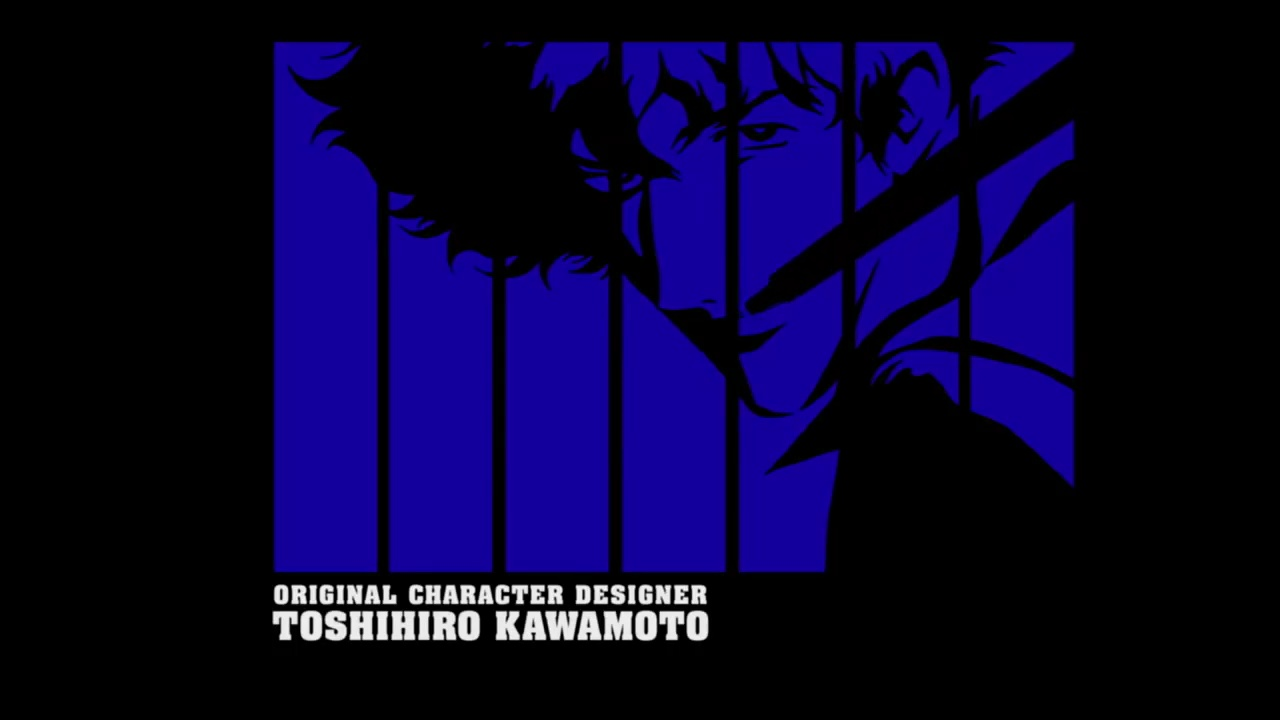

In [45]:
# input
playVideo(video_unprocessed)

In [46]:
fx = (
    AudioEffectsChain()
    .highshelf()
    .reverb()
)
#WAY TOO FUCKING SLOW
#TODO: down res for testing purposes
#TODO: try to accelerate with numba, write as a cuda kernel - have to reimplement audio fx for gpu
#TODO: multi-thread/process 
for i in range(video.shape[2]):
    for j in range(video.shape[1]):
        red_tensor = video[..., i, j, 0].astype(np.float32) 
        video[..., i, j, 0] = fx(red_tensor).astype(np.uint8)

        green_tensor = video[..., i, j, 1].astype(np.float32) 
        video[..., i, j, 1] = fx(green_tensor).astype(np.uint8)

        blue_tensor = video[..., i, j, 2].astype(np.float32) 
        video[..., i, j, 2] = fx(blue_tensor).astype(np.uint8)
playVideo(video)


KeyboardInterrupt: 